In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 

db = mysql.connector.connect(
    host='localhost',
    username='root',
    password='Sourabh@0909',
    database='ecommerce'
)

cur = db.cursor()



1. List all unique cities where customers are located.  

In [8]:
query = """select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


2 Count the number of orders placed in 2017

In [6]:
query = """select count(order_id) from  orders 
where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()
data 

[(90202,)]

3 Find the total sales per category.

In [3]:
query = """select count(order_id) from  orders 
where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()
data 

[(90202,)]

4 Calculate the percentage of orders that were paid in installments

In [5]:
query = """ select (sum(case when payment_installments >= 1 then 1 else 0 end))/ count(*)*100 from payments"""

cur.execute(query)

data = cur.fetchall()
data 

[(Decimal('99.9981'),)]

5 Count the number of customers from each state.

<function matplotlib.pyplot.show(close=None, block=None)>

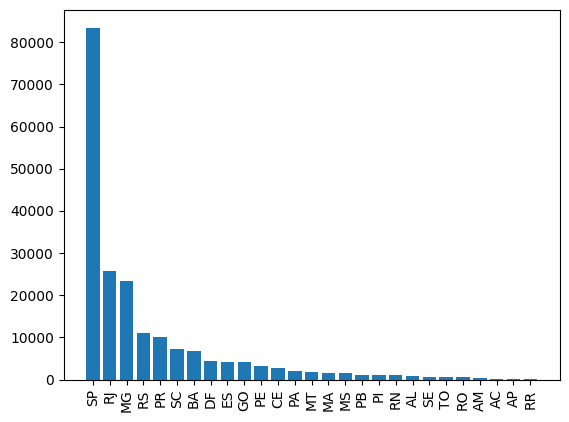

In [21]:
query = """ select customer_state, count(customer_id) from customers group by customer_state"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df = df.sort_values(by = "customer_count", ascending=False)

plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.show

6 Calculate the number of orders per month in 2018.

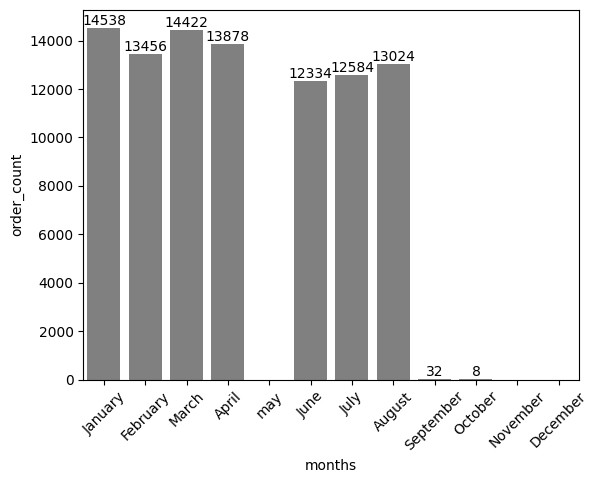

In [31]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count 
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February", "March", "April", "may", "June", "July", "August", "September", "October", "November", "December"]

ax = sns.barplot(x = df["months"], y = df["order_count"], data = df, order = o, color = "grey" )
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])


plt.show()

7  Find the average number of products per order, grouped by customer city.

In [30]:
query = """ with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as OC
from orders
join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.OC), 2) average_orders
from customers
join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer city", "Average per order"])
df.head(10 )

,customer city,Average per order
0,padre carvalho,14.00
1,celso ramos,13.00
2,datas,12.00
3,candido godoi,12.00
4,matias olimpio,10.00
5,cidelandia,8.00
6,curralinho,8.00
7,picarra,8.00
8,morro de sao paulo,8.00
9,teixeira soares,8.00
